For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

1. 
A dataset has been loaded and saved as a dataframe named codecademy. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:

- score: student score on a quiz
- completed: the number of other content items on Codecademy that the learner has completed prior to this quiz
- lesson: indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

Take a look at this dataset by printing the first five rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read in the data
codecademy = pd.read_csv('codecademy.csv')

# Print the first five rows
print(codecademy.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


**Model the relationship between quiz score and number of completed content items**
Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items. Make sure to show, then clear the plot.

Is there a relationship between these two variables, and does it appear to be linear?

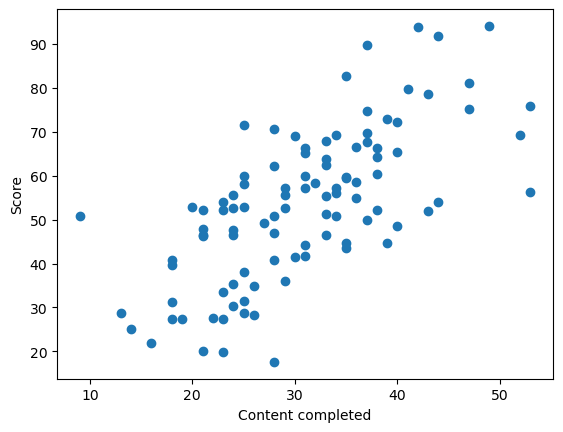

<Figure size 640x480 with 0 Axes>

In [2]:
plt.scatter(codecademy.completed, codecademy.score)
plt.xlabel("Content completed")
plt.ylabel("Score")
plt.show()
plt.clf()

_There is a linear relationship between `score` and `completed` content_

Create and fit a linear regression model that predicts score using completed as the predictor. Print out the regression coefficients.

In [3]:
model = sm.OLS.from_formula("score ~ completed", codecademy)
results = model.fit()
print(results.params)

Intercept    13.214113
completed     1.306826
dtype: float64


Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step.

_Intercept interpretation:_  When the student doesn't complete any content previously the expected score on a quiz is 13.
  
_Slope interpretation:_
  For every content completed previously by the student it is expected that his quiz score gained extra 1.30

Plot the same scatter plot that you made earlier (with score on the y-axis and completed on the x-axis), but this time add the regression line on top of the plot. 

Do you think this line fits the data well?

C:\Users\filip\AppData\Local\Temp\ipykernel_10308\120300500.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(codecademy.completed, results.params[1]*codecademy.completed + results.params[0])


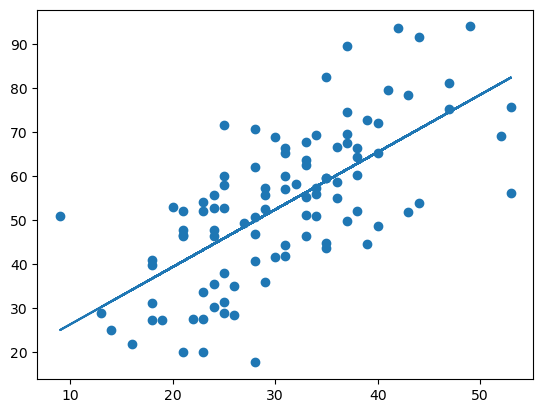

<Figure size 640x480 with 0 Axes>

In [4]:
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, results.params[1]*codecademy.completed + results.params[0])
plt.show()
plt.clf()

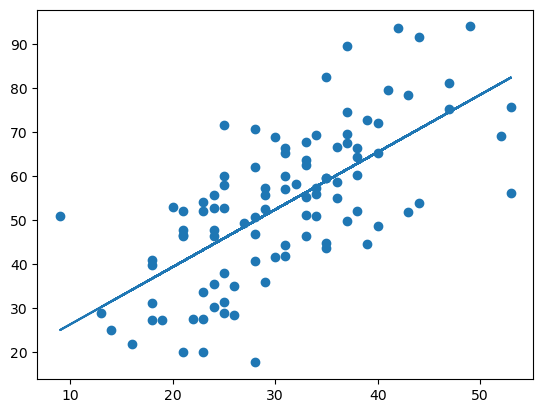

<Figure size 640x480 with 0 Axes>

In [6]:
#or:
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, results.predict(codecademy))
plt.show()
plt.clf()

Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items

In [7]:
Pred_20 = results.params[1]*20 + results.params[0]
print(Pred_20)

39.35062487732293


C:\Users\filip\AppData\Local\Temp\ipykernel_10308\2256392260.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pred_20 = results.params[1]*20 + results.params[0]


In [8]:
#OR:
newdata = {"completed": [20]}
print(results.predict(newdata))

0    39.350625
dtype: float64


Calculate the fitted values for your model and save them as fitted_values.

In [9]:
fitted_values = results.predict(codecademy)

Calculate the residuals for the model and save the result as residuals.

In [10]:
residuals = codecademy.score - fitted_values

Check the normality assumption for linear regression by plotting a histogram of the residuals.
Do the residuals appear to be approximately normally distributed?

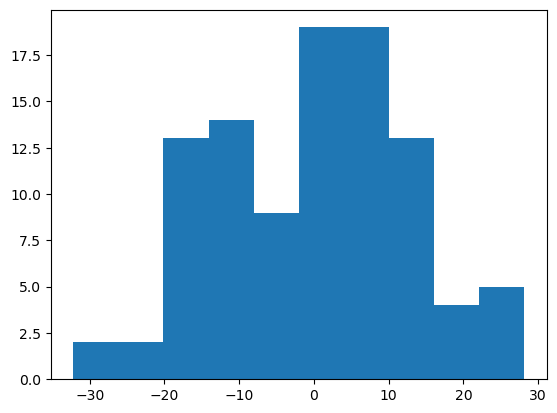

<Figure size 640x480 with 0 Axes>

In [11]:
plt.hist(residuals)
plt.show()
plt.clf()

_The residuals are normally distributed_

Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).

Do you see any patterns or is the homoscedasticity assumption met?

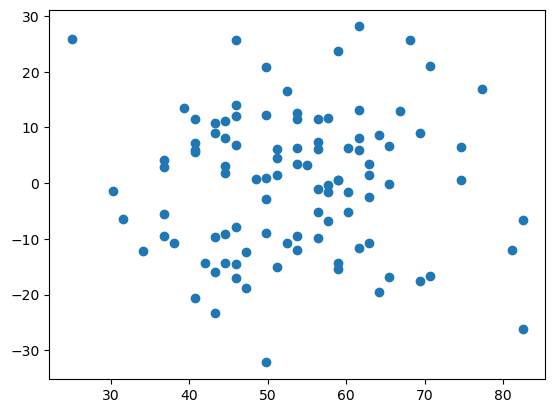

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()

_The homoscedasticity is met, since there is no pattern, and the values are centered around y = 0_

**Do learners who take lesson A or B perform better on the quiz?**
Let’s now turn our attention to the lessons column to see if learners who took different lessons scored differently on the quiz.

Use sns.boxplot to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. 

Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

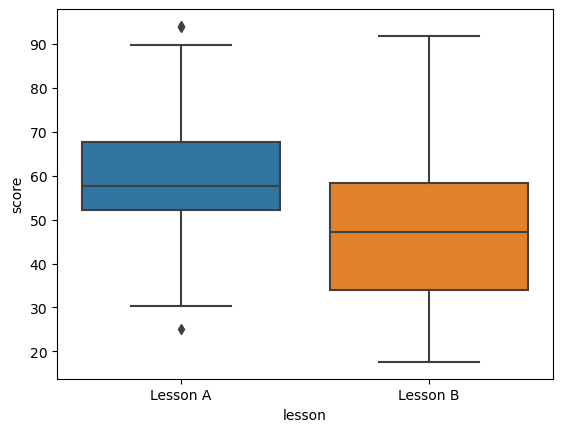

<Figure size 640x480 with 0 Axes>

In [14]:
sns.boxplot(x = "lesson", y="score", data = codecademy)
plt.show()
plt.clf()

_Lesson A seems to lead to higher scores_

Create and fit a linear regression model that predicts score using lesson as the predictor. Print out the regression coefficients.

In [15]:
model = sm.OLS.from_formula("score ~ lesson", codecademy)
results = model.fit()
print(results.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
Calculate and print out the mean difference.
Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

In [18]:
lessonA_mean = np.mean(codecademy.score[codecademy.lesson == "Lesson A"])
print("The mean quiz scores for learners who took Lesson A is:", round(lessonA_mean,3))
lessonB_mean = np.mean(codecademy.score[codecademy.lesson == "Lesson B"])
print("The mean quiz scores for learners who took Lesson B is:", round(lessonB_mean,3))
mean_difference_A_B = lessonA_mean - lessonB_mean
print("The mean difference between the two lessons is:", round(mean_difference_A_B,3))

The mean quiz scores for learners who took Lesson A is: 59.22
The mean quiz scores for learners who took Lesson B is: 47.578
The mean difference between the two lessons is: 11.642


_The mean for Lesson A scores corresponds to the y-intercept, while the difference between Lesson A and Lesson B means corresponds to the slope._